## Load anamnesis from files

In [10]:
import numpy as np
import pandas as pd
import re

In [11]:
PATH_TO_ANAMNESIS_DEV_DATA = "../../data/anamnesis/source/ru_med_nli_data_corpus/dev_v1.jsonl"
PATH_TO_ANAMNESIS_TEST_DATA = "../../data/anamnesis/source/ru_med_nli_data_corpus/test_v1.jsonl"
PATH_TO_ANAMNESIS_TRAIN_DATA = "../../data/anamnesis/source/ru_med_nli_data_corpus/train_v1.jsonl"

In [12]:
df_dev_data = pd.read_json(PATH_TO_ANAMNESIS_DEV_DATA, lines=True)

In [13]:
df_dev_data

,ru_sentence1,ru_sentence2,gold_label,pairID
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...",Пациент страдает стенокардией,entailment,1892c19a-66c7-11e7-be8f-f45c89b91419
1,"В анамнезе нет тромбозов или ТГВ, никогда не б...",Перенес несколько эпизодов ТЭЛА,contradiction,1892c578-66c7-11e7-97cf-f45c89b91419
2,"В анамнезе нет тромбозов или ТГВ, никогда не б...",У пациента коронарная недостаточность,neutral,1892c8ac-66c7-11e7-9f8f-f45c89b91419
3,В течение последней недели стал более сонливым...,В последнюю неделю он был менее внимателен,entailment,1892cadc-66c7-11e7-92e6-f45c89b91419
4,В течение последней недели стал более сонливым...,В последнюю неделю был бдителен и ориентирован,contradiction,1892cce4-66c7-11e7-8c22-f45c89b91419
...,...,...,...,...
1390,ИБС + операция коронарного шунтирования [**3-1...,У пациента нет заболеваний сердца,contradiction,189fc514-66c7-11e7-b374-f45c89b91419
1391,ИБС + операция коронарного шунтирования [**3-1...,У пациента в анамнезе инфаркт миокарда,neutral,189fc6f8-66c7-11e7-8314-f45c89b91419
1392,Респираторный статус улучшился при использован...,У пациента одышка.,entailment,189fc892-66c7-11e7-b6c4-f45c89b91419
1393,Респираторный статус улучшился при использован...,У больного нормальное дыхание.,contradiction,189fca18-66c7-11e7-9825-f45c89b91419


In [14]:
df_test_data = pd.read_json(PATH_TO_ANAMNESIS_TEST_DATA, lines=True)

In [15]:
df_test_data

,ru_sentence1,ru_sentence2,gold_label,pairID
0,В реанимации: измеренные жиз. показатели Т 37....,Пациент гемодинамически стабилен,entailment,1f2a8146-66c7-11e7-b4f2-f45c89b91419
1,В реанимации: измеренные жиз. показатели Т 37....,Пациент гемодинамически нестабилен.,contradiction,1f2a8538-66c7-11e7-8228-f45c89b91419
2,В реанимации: измеренные жиз. показатели Т 37....,Пациент испытывает боль.,neutral,1f2a87a4-66c7-11e7-a3d7-f45c89b91419
3,63-летняя женщина с гиперхолестеринемией и язв...,пациент попал в ДТП,entailment,1f2a89f0-66c7-11e7-922b-f45c89b91419
4,63-летняя женщина с гиперхолестеринемией и язв...,у пациента отстутствует история болезни,contradiction,1f2a8c36-66c7-11e7-9c12-f45c89b91419
...,...,...,...,...
1417,Во время этой госпитализации у пациента возник...,У пациента эуволемия.,contradiction,1f376b18-66c7-11e7-85ee-f45c89b91419
1418,Во время этой госпитализации у пациента возник...,У пациента застойная сердечная недостаточность.,neutral,1f376d36-66c7-11e7-9e5f-f45c89b91419
1419,"Папиллярная перитонеальная серозная карцинома,...",У пациента рак IV стадии,entailment,1f376ec2-66c7-11e7-84c9-f45c89b91419
1420,"Папиллярная перитонеальная серозная карцинома,...",У пациента нет злокачественных новообразований,contradiction,1f3770a4-66c7-11e7-9adb-f45c89b91419


In [16]:
df_train_data = pd.read_json(PATH_TO_ANAMNESIS_TRAIN_DATA, lines=True)
df_train_data

,ru_sentence1,ru_sentence2,gold_label,pairID
0,"Анализы отличались содержанием креатина 1,7 (и...",У пациента повышен креатин,entailment,23eb94b8-66c7-11e7-a8dc-f45c89b91419
1,"Анализы отличались содержанием креатина 1,7 (и...",У пациента нормальный креатин,contradiction,23eb979c-66c7-11e7-b76c-f45c89b91419
2,"Анализы отличались содержанием креатина 1,7 (и...",У пациента повышенный уровень азота в моче,neutral,23eb9986-66c7-11e7-9ef9-f45c89b91419
3,Отмечены нистагм и судорожное подергивание пра...,На неврологическом обследовании у пациента обн...,entailment,23eb9ba2-66c7-11e7-9ac1-f45c89b91419
4,Отмечены нистагм и судорожное подергивание пра...,У пациента нормальное неврологическое обследов...,contradiction,23eb9d64-66c7-11e7-a16b-f45c89b91419
...,...,...,...,...
11227,"Получил 2 ед цельной крови, прошёл ПЭТ сканиро...",Пациенту не проводилось процедуры ядерной меди...,contradiction,2449d50a-66c7-11e7-828c-f45c89b91419
11228,"Получил 2 ед цельной крови, прошёл ПЭТ сканиро...",У пациента активное кровотечение.,neutral,2449d712-66c7-11e7-9d9e-f45c89b91419
11229,Беременность осложнилась кровянистыми выделени...,Пациентка сообщила о кровянистых выделениях пр...,entailment,2449d9ae-66c7-11e7-8338-f45c89b91419
11230,Беременность осложнилась кровянистыми выделени...,Беременность протекала без осложнений,contradiction,2449db5e-66c7-11e7-b9aa-f45c89b91419


In [17]:
df = pd.concat([df_dev_data, df_test_data, df_train_data])

In [20]:
len(df)

14049

In [21]:
df.drop(columns=["gold_label","pairID"], inplace=True)

In [23]:
df_sentence1 = df.ru_sentence1
df_sentence2 = df.ru_sentence2

In [25]:
df = pd.concat([df_sentence1, df_sentence2])

In [26]:
df

0        В анамнезе нет тромбозов или ТГВ, никогда не б...
1        В анамнезе нет тромбозов или ТГВ, никогда не б...
2        В анамнезе нет тромбозов или ТГВ, никогда не б...
3        В течение последней недели стал более сонливым...
4        В течение последней недели стал более сонливым...
                               ...                        
11227    Пациенту не проводилось процедуры ядерной меди...
11228                    У пациента активное кровотечение.
11229    Пациентка сообщила о кровянистых выделениях пр...
11230                Беременность протекала без осложнений
11231        У неё в анамнезе были самопроизвольные аборты
Length: 28098, dtype: object

In [27]:
df = df.to_frame(name="data")

In [28]:
df.reset_index(drop=True, inplace=True)

In [29]:
df

,data
0,"В анамнезе нет тромбозов или ТГВ, никогда не б..."
1,"В анамнезе нет тромбозов или ТГВ, никогда не б..."
2,"В анамнезе нет тромбозов или ТГВ, никогда не б..."
3,В течение последней недели стал более сонливым...
4,В течение последней недели стал более сонливым...
...,...
28093,Пациенту не проводилось процедуры ядерной меди...
28094,У пациента активное кровотечение.
28095,Пациентка сообщила о кровянистых выделениях пр...
28096,Беременность протекала без осложнений


In [33]:
df = pd.DataFrame(df.data.unique())

In [42]:
df = df.rename({0: "data"}, axis=1)

In [50]:
df

,data,tokens,tokens_size
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16
...,...,...,...
14712,пациент - один из близнецов,"[пациент, -, один, из, близнецов]",5
14713,у пациентки была беременность с низким риском,"[у, пациентки, была, беременность, с, низким, ...",7
14714,Пациенту не проводилось процедуры ядерной меди...,"[Пациенту, не, проводилось, процедуры, ядерной...",7
14715,Пациентка сообщила о кровянистых выделениях пр...,"[Пациентка, сообщила, о, кровянистых, выделени...",7


## Tokenize anamnesis texts

Let's tokenize anamnesis

In [51]:
!pip install mosestokenizer

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/MedSpellChecker/venv/bin/python -m pip install --upgrade pip' command.


In [52]:
from mosestokenizer import MosesTokenizer
tokenize = MosesTokenizer(lang="ru")

In [53]:
all_anamnesis_tokens = [tokenize(text) for text in df.data]

In [54]:
df["tokens"] = all_anamnesis_tokens

In [55]:
df["tokens"]

0        [В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...
1        [В, течение, последней, недели, стал, более, с...
2        [ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...
3        [Во, время, госпитализации, у, пациента, посте...
4        [Лечили, сульфатом, магния, ,, лабеталолом, ,,...
                               ...                        
14712                    [пациент, -, один, из, близнецов]
14713    [у, пациентки, была, беременность, с, низким, ...
14714    [Пациенту, не, проводилось, процедуры, ядерной...
14715    [Пациентка, сообщила, о, кровянистых, выделени...
14716    [У, неё, в, анамнезе, были, самопроизвольные, ...
Name: tokens, Length: 14717, dtype: object

## Filter tokens and make some analyse of words count distribution

Let's filter tokens

In [56]:
df["tokens_size"] = [len(tokens) for tokens in df["tokens"]]

<AxesSubplot:>

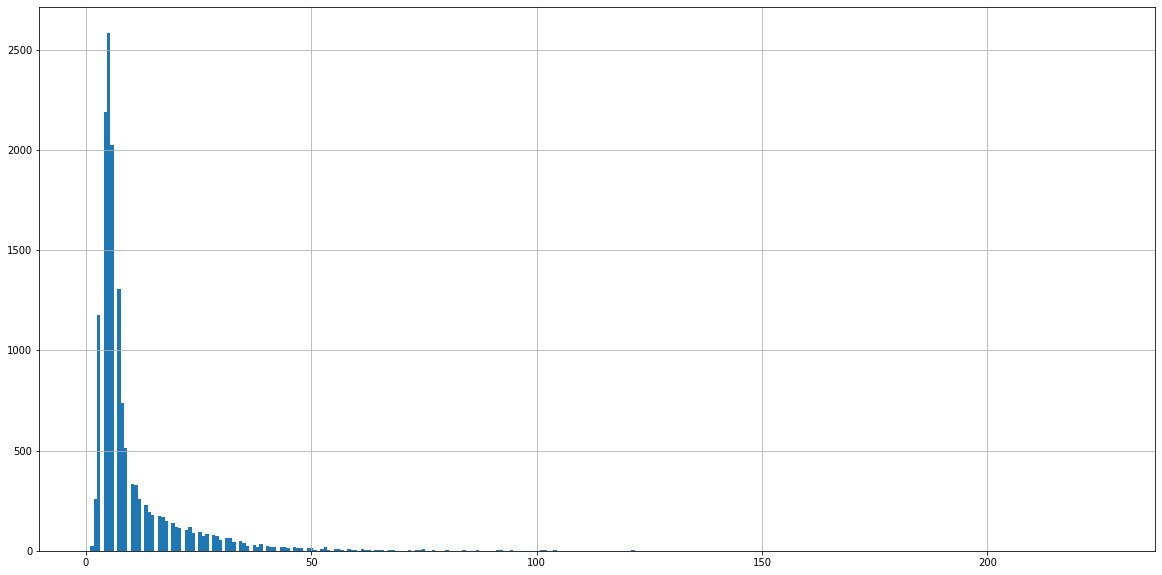

In [57]:
df["tokens_size"].hist(bins=300, figsize=(20,10))

It seems like this data some kind of surrogate since there is empty place between bars.

In [103]:
import regex

# Filter words with any non-сyrillic character
def filter_invalid_token(token_list):
    return [token for token in token_list if (not regex.search("\P{Cyrillic}", token))]

In [104]:
df["filtered_tokens"] = [filter_invalid_token(tokens) for tokens in df["tokens"]]

In [105]:
df["filtered_tokens"]

0        [В, анамнезе, нет, тромбозов, или, ТГВ, никогд...
1        [В, течение, последней, недели, стал, более, с...
2        [ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...
3        [Во, время, госпитализации, у, пациента, посте...
4        [Лечили, сульфатом, магния, лабеталолом, гидра...
                               ...                        
14712                       [пациент, один, из, близнецов]
14713    [у, пациентки, была, беременность, с, низким, ...
14714    [Пациенту, не, проводилось, процедуры, ядерной...
14715    [Пациентка, сообщила, о, кровянистых, выделени...
14716    [У, неё, в, анамнезе, были, самопроизвольные, ...
Name: filtered_tokens, Length: 14717, dtype: object

In [106]:
df["filtered_tokens_size"] = [len(tokens) for tokens in df["filtered_tokens"]]

<AxesSubplot:>

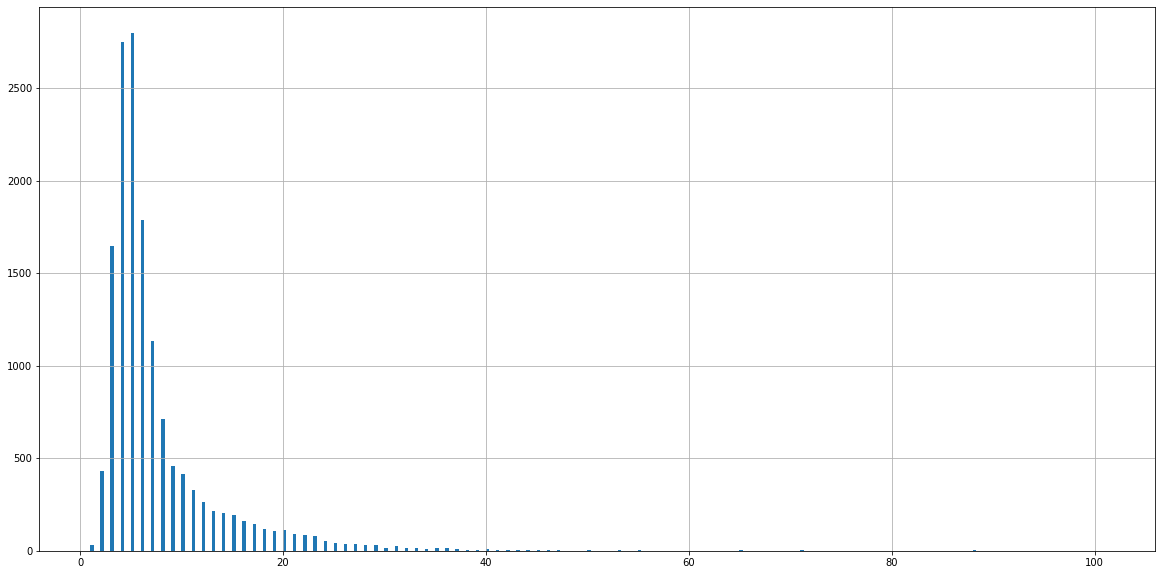

In [107]:
df["filtered_tokens_size"].hist(bins=300, figsize=(20,10))

In [108]:
quantile_levels = [.25,.5,.75,.9,.95,.99]
filtered_tokens_size_quantiles = df["filtered_tokens_size"].quantile(quantile_levels)
filtered_tokens_size_quantiles

0.25     4.0
0.50     5.0
0.75     8.0
0.90    15.0
0.95    20.0
0.99    32.0
Name: filtered_tokens_size, dtype: float64

In [109]:
df["filtered_tokens_size"].value_counts()

5     2799
4     2750
6     1789
3     1649
7     1134
      ... 
57       1
66       1
93       1
54       1
75       1
Name: filtered_tokens_size, Length: 66, dtype: int64

Check anamnesis with extremely low word counts

In [110]:
df[df["filtered_tokens_size"] <= 5]

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size
11,"Выявлен ИМпST с тропонином 0,11.","[Выявлен, ИМпST, с, тропонином, 0,11, .]",6,"[Выявлен, с, тропонином]",3
14,Сахарный диабет II типа.,"[Сахарный, диабет, II, типа, .]",5,"[Сахарный, диабет, типа]",3
23,"ХСН, ФВ 55% 6.","[ХСН, ,, ФВ, 55, %, 6, .]",7,"[ХСН, ФВ]",2
26,Монгольские пятна на спине.,"[Монгольские, пятна, на, спине, .]",5,"[Монгольские, пятна, на, спине]",4
44,АНАМНЕЗ: Не способен воспринимать команды.,"[АНАМНЕЗ, :, Не, способен, воспринимать, коман...",7,"[АНАМНЕЗ, Не, способен, воспринимать, команды]",5
...,...,...,...,...,...
14706,пациентка проходит лечение от бесплодия,"[пациентка, проходит, лечение, от, бесплодия]",5,"[пациентка, проходит, лечение, от, бесплодия]",5
14707,пациентка имеет преклонный материнский возраст,"[пациентка, имеет, преклонный, материнский, во...",5,"[пациентка, имеет, преклонный, материнский, во...",5
14709,Пациент имеет нормальный ур гематокрита,"[Пациент, имеет, нормальный, ур, гематокрита]",5,"[Пациент, имеет, нормальный, ур, гематокрита]",5
14711,пациентка родила здорового ребёнка,"[пациентка, родила, здорового, ребёнка]",4,"[пациентка, родила, здорового, ребёнка]",4


In [111]:
df = df[df["filtered_tokens_size"] != 0]
df

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18,"[В, анамнезе, нет, тромбозов, или, ТГВ, никогд...",16
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11,"[В, течение, последней, недели, стал, более, с...",10
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",20
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26,"[Во, время, госпитализации, у, пациента, посте...",23
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16,"[Лечили, сульфатом, магния, лабеталолом, гидра...",12
...,...,...,...,...,...
14712,пациент - один из близнецов,"[пациент, -, один, из, близнецов]",5,"[пациент, один, из, близнецов]",4
14713,у пациентки была беременность с низким риском,"[у, пациентки, была, беременность, с, низким, ...",7,"[у, пациентки, была, беременность, с, низким, ...",7
14714,Пациенту не проводилось процедуры ядерной меди...,"[Пациенту, не, проводилось, процедуры, ядерной...",7,"[Пациенту, не, проводилось, процедуры, ядерной...",6
14715,Пациентка сообщила о кровянистых выделениях пр...,"[Пациентка, сообщила, о, кровянистых, выделени...",7,"[Пациентка, сообщила, о, кровянистых, выделени...",7


Check anamnesis with many tokens

In [112]:
for tokens in df[df["filtered_tokens_size"] > 60]["filtered_tokens"]:
    print(tokens)

['На', 'приёме', 'у', 'доктора', 'Имя', 'мобильное', 'УЗИ', 'выявило', 'Сложный', 'материал', 'в', 'полости', 'эндометрия', 'от', 'дна', 'до', 'внутреннего', 'отверстия', 'диаметром', 'около', 'см', 'с', 'сосудами', 'сохраненные', 'продукты', 'зачатия', 'Кроме', 'того', 'в', 'области', 'переднего', 'дна', 'граница', 'между', 'миометрием', 'и', 'сохраненными', 'продуктами', 'зачатия', 'размыта', 'что', 'вероятно', 'представляет', 'аккрецию', 'Свободной', 'жидкости', 'и', 'гидронефроза', 'нет', 'Таким', 'образом', 'поскольку', 'ее', 'жизненные', 'показатели', 'были', 'стабильными', 'ее', 'перевели', 'в', 'стационар', 'для', 'дальнейшей', 'оценки', 'и', 'планирования']
['ИБС', 'выполненная', 'процедура', 'чрезкожного', 'коронарного', 'вмешательства', 'в', 'тупая', 'краевая', 'с', 'поражением', 'сосудов', 'на', 'катетеризации', 'в', 'От', 'умеренной', 'до', 'тяжелой', 'Систолическая', 'и', 'диастолическая', 'ХСН', 'на', 'эхокг', 'в', 'Пульмозная', 'ГВС', 'Левая', 'операция', 'катаракты', '

It's ok

## Try to detect stopwords for anamnesis by tf-idf metric

Let's find stopwords by tf-idf to filter it out

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tf_idf_vectorizer = TfidfVectorizer()

In [115]:
filtered_tokens_string = df["filtered_tokens"].apply(lambda x: " ".join(x))
filtered_tokens_string

0        В анамнезе нет тромбозов или ТГВ никогда не бы...
1        В течение последней недели стал более сонливым...
2        ХОБЛ астма Спирометрия ФЖЕЛ ФЖЕЛ объём легких ...
3        Во время госпитализации у пациента постепенно ...
4        Лечили сульфатом магния лабеталолом гидралазин...
                               ...                        
14712                            пациент один из близнецов
14713        у пациентки была беременность с низким риском
14714    Пациенту не проводилось процедуры ядерной меди...
14715    Пациентка сообщила о кровянистых выделениях пр...
14716        У неё в анамнезе были самопроизвольные аборты
Name: filtered_tokens, Length: 14717, dtype: object

In [116]:
tf_idf_vectorizer = tf_idf_vectorizer.fit(filtered_tokens_string)

In [117]:
feature_names_string = " ".join(tf_idf_vectorizer.get_feature_names_out())
feature_names_string

'абактериальной абдоминальная абдоминальное абдоминальной абдоминальном абдоминальную абдоминальные аблации аблация абляции абляцию абляция аборт аборта аборты абстинентного абстинентном абстинентные абстиненции абсцесс абсцесса абсцессами абсцессом ав авалокс аварией аварии аварию авидность авитаминоза авм автобус автокресле автомобиле автомобилем автомобильной автомобильном автомобильную автомобиля авф аг аггрестат агенезии агенезия агональном агренокс агрессивна агрессивная агрессивного агрессивное агрессивный ад адвил адвилом аддисона адекватная адекватно адекватное адекватную адекватными аденоидэктомии аденоидэктомия аденокарцинома аденокарциномы аденома аденомой аденому аденомы аденопатию аденопатия адреналин адреналина адреноблокатор адреноблокаторы адрес адриамицин азиатско азии азитромицин азитромицина азитромицином азот азота азотемией азтреонам азтреонама акинез акинетической аккрецию акн аксиальные аксональная аксональное акта активатор активаторами активен активированного 

In [118]:
tf_idf_matrix = tf_idf_vectorizer.transform([feature_names_string])
tf_idf_array = tf_idf_matrix.toarray().flatten()
tf_idf_array

array([0.00914416, 0.00757015, 0.00798747, ..., 0.00914416, 0.00748981,
       0.00914416])

In [119]:
feature_names_with_tf_idf = np.array([tf_idf_vectorizer.get_feature_names_out(), tf_idf_array]).transpose()

In [120]:
tf_idf_df = pd.DataFrame(feature_names_with_tf_idf, columns=["word","tf-idf"])
tf_idf_df

,word,tf-idf
0,абактериальной,0.009144
1,абдоминальная,0.00757
2,абдоминальное,0.007987
3,абдоминальной,0.007987
4,абдоминальном,0.009144
...,...,...
13379,ясно,0.00877
13380,ясное,0.00877
13381,ясноклеточной,0.009144
13382,ясном,0.00749


In [121]:
sorted_tf_idf_df = tf_idf_df.sort_values("tf-idf", ascending=True, ignore_index=True)
sorted_tf_idf_df

,word,tf-idf
0,пациента,0.002092
1,пациент,0.002592
2,на,0.003125
3,не,0.003193
4,анамнезе,0.003613
...,...,...
13379,небулайзеров,0.009144
13380,небыло,0.009144
13381,неважно,0.009144
13382,неблагоприятный,0.009144


## Use stopwords from nltk

So it's too strange, and I mess to find any good threshold for define stop words list
Therefore we will use common stopwords from nltk lib.

In [122]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dmitrypogrebnoy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [123]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

Let's use common nltk stopwords for russian and filter it out from anamnesis

In [124]:
df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))
df.head()

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18,"[В, анамнезе, нет, тромбозов, или, ТГВ, никогд...",16,"[В, анамнезе, тромбозов, ТГВ, болей, груди, сл..."
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11,"[В, течение, последней, недели, стал, более, с...",10,"[В, течение, последней, недели, стал, сонливым..."
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",20,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ..."
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26,"[Во, время, госпитализации, у, пациента, посте...",23,"[Во, время, госпитализации, пациента, постепен..."
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16,"[Лечили, сульфатом, магния, лабеталолом, гидра...",12,"[Лечили, сульфатом, магния, лабеталолом, гидра..."


In [125]:
df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))
df.head()

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18,"[В, анамнезе, нет, тромбозов, или, ТГВ, никогд...",16,"[В, анамнезе, тромбозов, ТГВ, болей, груди, сл...",9
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11,"[В, течение, последней, недели, стал, более, с...",10,"[В, течение, последней, недели, стал, сонливым...",8
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",20,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",19
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26,"[Во, время, госпитализации, у, пациента, посте...",23,"[Во, время, госпитализации, пациента, постепен...",18
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16,"[Лечили, сульфатом, магния, лабеталолом, гидра...",12,"[Лечили, сульфатом, магния, лабеталолом, гидра...",10


## Lemmatization

Also, we need to perform lemmatization for anamnesis words

In [126]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()

In [127]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \
    df["filtered_tokens_without_nltk_stopwords"].apply(lambda words: list(map(lambda word: lemmatizer.parse(word)[0].normal_form, words)))
df.head()

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18,"[В, анамнезе, нет, тромбозов, или, ТГВ, никогд...",16,"[В, анамнезе, тромбозов, ТГВ, болей, груди, сл...",9,"[в, анамнез, тромбоз, тгв, боль, грудь, случай..."
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11,"[В, течение, последней, недели, стал, более, с...",10,"[В, течение, последней, недели, стал, сонливым...",8,"[в, течение, последний, неделя, стать, сонливы..."
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",20,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",19,"[хобл, астма, спирометрия, фжеть, фжеть, объём..."
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26,"[Во, время, госпитализации, у, пациента, посте...",23,"[Во, время, госпитализации, пациента, постепен...",18,"[в, время, госпитализация, пациент, постепенно..."
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16,"[Лечили, сульфатом, магния, лабеталолом, гидра...",12,"[Лечили, сульфатом, магния, лабеталолом, гидра...",10,"[лечить, сульфат, магний, лабеталол, гидралази..."


In [128]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))
df

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size
0,"В анамнезе нет тромбозов или ТГВ, никогда не б...","[В, анамнезе, нет, тромбозов, или, ТГВ, ,, ник...",18,"[В, анамнезе, нет, тромбозов, или, ТГВ, никогд...",16,"[В, анамнезе, тромбозов, ТГВ, болей, груди, сл...",9,"[в, анамнез, тромбоз, тгв, боль, грудь, случай...",9
1,В течение последней недели стал более сонливым...,"[В, течение, последней, недели, стал, более, с...",11,"[В, течение, последней, недели, стал, более, с...",10,"[В, течение, последней, недели, стал, сонливым...",8,"[в, течение, последний, неделя, стать, сонливы...",8
2,ХОБЛ/астма: Спирометрия ([**4-/3393**]) ФЖЕЛ 2...,"[ХОБЛ, /, астма, :, Спирометрия, (, &#91;, *, ...",101,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",20,"[ХОБЛ, астма, Спирометрия, ФЖЕЛ, ФЖЕЛ, объём, ...",19,"[хобл, астма, спирометрия, фжеть, фжеть, объём...",19
3,Во время госпитализации у пациента постепенно ...,"[Во, время, госпитализации, у, пациента, посте...",26,"[Во, время, госпитализации, у, пациента, посте...",23,"[Во, время, госпитализации, пациента, постепен...",18,"[в, время, госпитализация, пациент, постепенно...",18
4,"Лечили сульфатом магния, лабеталолом, гидралаз...","[Лечили, сульфатом, магния, ,, лабеталолом, ,,...",16,"[Лечили, сульфатом, магния, лабеталолом, гидра...",12,"[Лечили, сульфатом, магния, лабеталолом, гидра...",10,"[лечить, сульфат, магний, лабеталол, гидралази...",10
...,...,...,...,...,...,...,...,...,...
14712,пациент - один из близнецов,"[пациент, -, один, из, близнецов]",5,"[пациент, один, из, близнецов]",4,"[пациент, близнецов]",2,"[пациент, близнец]",2
14713,у пациентки была беременность с низким риском,"[у, пациентки, была, беременность, с, низким, ...",7,"[у, пациентки, была, беременность, с, низким, ...",7,"[пациентки, беременность, низким, риском]",4,"[пациентка, беременность, низкий, риск]",4
14714,Пациенту не проводилось процедуры ядерной меди...,"[Пациенту, не, проводилось, процедуры, ядерной...",7,"[Пациенту, не, проводилось, процедуры, ядерной...",6,"[Пациенту, проводилось, процедуры, ядерной, ме...",5,"[пациент, проводиться, процедура, ядерный, мед...",5
14715,Пациентка сообщила о кровянистых выделениях пр...,"[Пациентка, сообщила, о, кровянистых, выделени...",7,"[Пациентка, сообщила, о, кровянистых, выделени...",7,"[Пациентка, сообщила, кровянистых, выделениях,...",5,"[пациентка, сообщить, кровянистый, выделение, ...",5


Check that the lemmatization doesn't drop any words from anamnesis texts

In [129]:
df[df["filtered_tokens_without_nltk_stopwords_size"] != df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"]]

,data,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size


## Save result dataframe to file

In [130]:
df.to_csv("../../data/anamnesis/processed/ru_med_nli_data_dataframe.csv")